In [1]:
import BEaRDS as B
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

First we want to use pandas to open the CSV file you will be reading the data from. As an example we will use:

In [2]:
data = pd.read_csv('Test_Data/Test_Data.txt')

We will then use the beards function separate_freqs to take this and put it into a workable python dictionary avoiding any issues that matplotlib has with pandas arrays.

In [3]:
extracted = B.separate_freqs(data)
extracted

{'Time': array(['2018-09-10  08:53:29', '2018-09-10  08:53:35',
        '2018-09-10  08:53:36', ..., '2018-09-10  09:57:35',
        '2018-09-10  09:57:41', '2018-09-10  09:57:43'], dtype=object),
 'Frequencies': array([1.53653361e+09, 1.53653362e+09, 1.53653362e+09, ...,
        1.53653746e+09, 1.53653746e+09, 1.53653746e+09]),
 'Num of Samples': array([3, 2, 2, ..., 2, 2, 2], dtype=int64),
 'Length': array([6000, 6000, 6000, ..., 6000, 6000, 6000], dtype=int64),
 'Had issue': array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 'GPS fix': array([nan, nan, nan, ..., nan, nan, nan]),
 'GPS LAT': array([nan, nan, nan, ..., nan, nan, nan]),
 'GPS LON': array([nan, nan, nan, ..., nan, nan, nan]),
 0: array([-64.28, -58.98, -64.96, ...,  -6.02,  -5.64,  -5.83]),
 1: array([-57.58, -60.69, -65.05, ..., -18.1 , -17.88, -18.12]),
 2: array([-56.44, -60.76, -72.4 , ..., -36.75, -36.39, -35.42]),
 3: array([-56.89, -62.86, -62.3 , ..., -43.84, -43.56, -47.44]),
 4: array([-63.98, -76.62, -60.14, ..., 

The beards mean function can then take the dictionary created and take the average of all values for each frequency measured and input it into a new dictionary.

In [4]:
mean_values = B.mean(extracted)
mean_values

{0: -43.23035215946844,
 1: -47.26473089700997,
 2: -53.238498338870436,
 3: -56.772976744186046,
 4: -55.95570099667774,
 10: -47.029322259136215,
 11: -51.06485049833886,
 12: -56.76555481727575,
 13: -59.180910299003315,
 14: -55.92360797342192,
 5: -57.97053820598007,
 6: -58.89244518272425,
 7: -57.56605980066445,
 8: -55.6711295681063,
 9: -49.54969435215948,
 15: -58.33934219269103,
 16: -56.16301661129568,
 17: -51.164956810631224,
 18: -42.09940863787376,
 19: -35.76514950166112,
 20: -59.59936877076411,
 21: -59.75158139534884,
 22: -59.16526245847176,
 23: -59.09994684385382,
 24: -59.94334219269103,
 30: -60.21789368770764,
 31: -60.149647840531564,
 32: -59.996358803986716,
 33: -60.17371428571429,
 34: -60.16908305647841,
 25: -60.04898338870432,
 26: -59.55146179401993,
 27: -59.92295681063122,
 28: -60.22329568106312,
 29: -60.23874418604651,
 35: -60.366757475083055,
 36: -60.12205315614618,
 37: -60.042571428571435,
 38: -60.67037209302326,
 39: -60.63237209302326,
 4

Another option for the means is using the beards module mean_freqs which instead of taking the extracted dictionary takes the original CSV file.

In [5]:
mean_values = B.mean_freqs(data)
mean_values

{'0 MHz': -43.23035215946844,
 '1 MHz': -47.26473089700995,
 '2 MHz': -53.23849833887038,
 '3 MHz': -56.77297674418606,
 '4 MHz': -55.95570099667783,
 '10 MHz': -47.02932225913618,
 '11 MHz': -51.06485049833894,
 '12 MHz': -56.765554817275756,
 '13 MHz': -59.180910299003315,
 '14 MHz': -55.92360797342202,
 '5 MHz': -57.97053820597997,
 '6 MHz': -58.89244518272424,
 '7 MHz': -57.56605980066445,
 '8 MHz': -55.67112956810617,
 '9 MHz': -49.54969435215946,
 '15 MHz': -58.33934219269101,
 '16 MHz': -56.163016611295575,
 '17 MHz': -51.164956810631224,
 '18 MHz': -42.099408637873786,
 '19 MHz': -35.76514950166115,
 '20 MHz': -59.59936877076404,
 '21 MHz': -59.75158139534883,
 '22 MHz': -59.16526245847172,
 '23 MHz': -59.09994684385372,
 '24 MHz': -59.94334219269097,
 '30 MHz': -60.217893687707615,
 '31 MHz': -60.14964784053155,
 '32 MHz': -59.99635880398676,
 '33 MHz': -60.1737142857144,
 '34 MHz': -60.16908305647843,
 '25 MHz': -60.0489833887043,
 '26 MHz': -59.55146179402006,
 '27 MHz': -59

In [6]:
len(mean_values)

6000

For analysis of the data the amount of frequencies measured may be excessive. With 6000 different frequencies in this example it can be a very uninformative plot. For example:

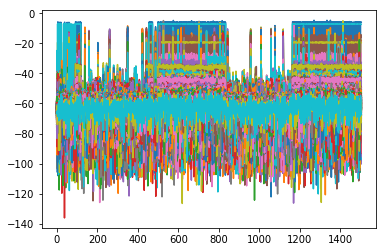

In [7]:
for key,value in extracted.items(): #the  .items() creates an array of arrays with the key and value of a dictionary.
    if isinstance(key, int): #isinstance is a way to check if a variable is a str, int, float, etc
        plt.plot(value)

A solution to this is by using the beards pull_targets function. This function will take an array of frequencies you would like to analyse and create a new dictionary with only those frequencies.

In [8]:
target_frequencies = np.asarray([327,408,1420,1665,1667,5000])
target_data = B.pulltargets(target_frequencies,extracted)
target_data

{327: array([-63.78, -63.53, -62.13, ..., -58.02, -57.16, -59.21]),
 408: array([-58.71, -62.35, -65.82, ..., -64.51, -64.25, -54.22]),
 1420: array([-59.34, -64.68, -63.31, ..., -58.73, -60.64, -60.13]),
 1665: array([-62.97, -60.89, -62.73, ..., -64.09, -57.74, -64.14]),
 1667: array([-70.46, -63.64, -63.7 , ..., -52.6 , -60.74, -63.77]),
 5000: array([-69.21, -61.49, -63.59, ..., -61.8 , -59.98, -57.4 ])}

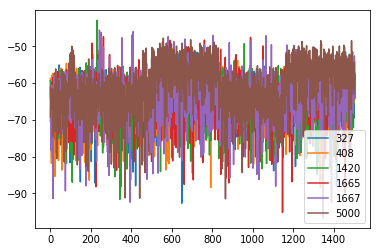

In [9]:
for key,value in target_data.items(): 
    plt.plot(value, label = "%s" %key)
    plt.legend()

Another solution to look at all the frequencies at the same time it to view it as a waterfall plot. The beards function waterfall_plot will take the original pandas CSV file and plot it as a waterfall plot.

z (6000, 1505) x (6000,) y (1505,)


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x182ec3757f0>)

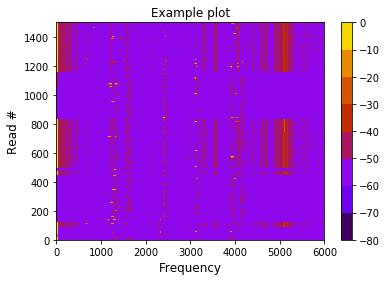

In [10]:
B.waterfall_plot(data, 'Example plot', ax=None, vmax=0, vmin=-80, nlevels=9)

If you want to do the same plot with a dictionary you have created you can also use waterfall_plot_dict. Though you will need to add the time component yourself.

z (6000, 1505) x (6000,) y (1505,)


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x182ec79cef0>)

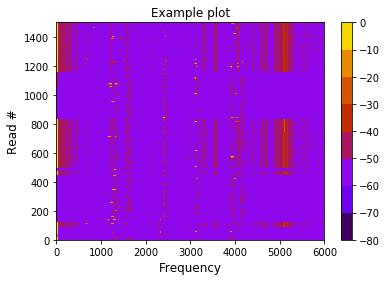

In [11]:
B.waterfall_plot_dict(extracted, extracted['Time'], 'Example plot', ax=None, vmax=0, vmin=-80, nlevels=9)

The BEaRDS module also has two other little used functions. KepRot and Doppler. These functions are designed to work together. By using a spherical approximation model of a galaxy KepRot can calculate the approximate radial velocity an object can be travelling. The Doppler function then takes the output of KepRot and an array of frequencies of interest and then calculates what the potential doppler shift could be of those frequencies.

In [12]:
B.KepRot(26000) #distance from earth to center of galaxy in Ly

262157.5784635699

In [13]:
B.Doppler(target_frequencies,B.KepRot(26000))

[1664,
 1665,
 1666,
 1667,
 1668,
 4995,
 4996,
 4997,
 4998,
 4999,
 1418,
 1419,
 1420,
 1421,
 5000,
 5001,
 5002,
 5003,
 5004,
 407,
 408,
 326,
 327,
 1663]

That's essentially all of the BEaRDS module. The reason behind using dictionaries in the module is so that if you have two sets of data, say one is a baseline for noise and another is measurements it is possible to then subtract one from the other.